In [48]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import scipy.io as sp
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

#X = StandardScaler().fit_transform(X)


KNeighborsClassifier(
    n_neighbors=10,          # The number of neighbours to consider
    weights='uniform',      # How to weight distances
    algorithm='auto',       # Algorithm to compute the neighbours
    leaf_size=30,           # The leaf size to speed up searches
    p=2,                    # The power parameter for the Minkowski metric (use p=1 for euclidiean)
    metric='minkowski',     # The type of distance to use
    metric_params=None,     # Keyword arguments for the metric function
    n_jobs=None 
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
clf = KNeighborsClassifier(p=1, n_neighbors=10, algorithm='auto', n_jobs=None)
clf.fit(X_train, y_train.ravel())
predictions = clf.predict(X_test)



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, predictions)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,predictions)
print("Accuracy 1 :",result2)
#Entraînement



#sns.set_style('whitegrid')
#Z=pd.DataFrame(np.c_[dataset['X'],dataset['y']],)
#sns.pairplot(Z)

#print(accuracy_score(y_test, predictions))

Accuracy 1 : 0.9649122807017544
Accuracy 2 : 0.9649122807017544


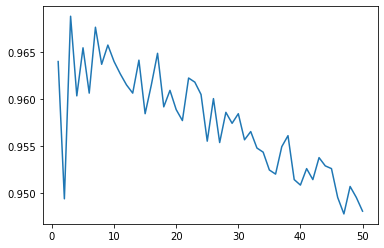

In [51]:
valeur_k=[]
precisions=[]

for k in range(1,51) :
    valeur_accu=0
    for i in range(1,21) :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
        clf = KNeighborsClassifier(p=1, n_neighbors=k, algorithm='auto', n_jobs=None)
        clf.fit(X_train, y_train.ravel())
        predictions = clf.predict(X_test)
        valeur_accu=valeur_accu+accuracy_score(y_test, predictions)
        accu_k=valeur_accu/20
    valeur_k.append(k)
    precisions.append(accu_k)
    
from matplotlib import pyplot as plt
plt.plot(valeur_k,precisions)
plt.show()